In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ryan/Desktop/Streamlit Apps/NBAInjuryAnalysisData/fullfinal.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0_x,PLAYER_ID,PLAYER_NAME,AGE,POSITION,Season,Team Name,TEAM_ABREVIATION,TEAM_ID,...,B2B,Team Miles Traveled,Unnamed: 0_y,DIST_FEET,DIST_MILES,DIST_MILES_OFF,DIST_MILES_DEF,AVG_SPEED,AVG_SPEED_OFF,AVG_SPEED_DEF
0,0,0,201985,AJ Price,27.0,Guard,2013-14,NaN,MIN,1610612750,...,21.0,53730.0,0,1350.46,0.26,0.14,0.11,4.37,4.62,3.96
1,2,1,201166,Aaron Brooks,29.0,Guard,2013-14,NaN,DEN,1610612743,...,14.0,44230.0,1,8027.67,1.52,0.77,0.75,4.23,4.49,3.99
2,4,2,201189,Aaron Gray,29.0,Center,2013-14,Raptors,SAC,1610612758,...,19.0,44455.0,2,3586.69,0.68,0.37,0.31,4.23,4.49,3.91
3,6,3,201189,Aaron Gray,29.0,Center,2013-14,Raptors,SAC,1610612758,...,19.0,44455.0,2,3586.69,0.68,0.37,0.31,4.23,4.49,3.91
4,8,4,201189,Aaron Gray,29.0,Center,2013-14,Raptors,SAC,1610612758,...,19.0,44455.0,2,3586.69,0.68,0.37,0.31,4.23,4.49,3.91


In [18]:
df['Injured'] = np.where(df['Injury Type'].notna(),1,0)

In [19]:
df['Injured'].value_counts()

Injured
0    5464
1    5300
Name: count, dtype: int64

In [25]:
df = df.drop_duplicates(subset=['PLAYER_NAME','Season'])

In [26]:
df['Injured'].value_counts()

Injured
0    3510
1    2193
Name: count, dtype: int64

In [13]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 0_x','PLAYER_ID','Team Name','TEAM_ABREVIATION','TEAM_ID','DRAFT_ROUND','DRAFT_NUMBER','PLAYER_HEIGHT','COLLEGE','COUNTRY','Unnamed: 0_y','FROM_YEAR','DRAFT_YEAR','W_x','L_x'])

In [27]:
df = df.drop(columns=['Date Returned','Injury Date','Days Missed'])

In [32]:
df = df.drop(columns=['Notes','Injury Type'])

In [33]:
for col in df.columns:
    print(col)

PLAYER_NAME
AGE
POSITION
Season
Experience
PLAYER_HEIGHT_INCHES
PLAYER_WEIGHT
GP_x
MIN_x
PTS_PER_TOUCH
REB
REB.1
AST
STL
BLK
OREB
DREB_x
TOUCHES
DRIVES
DRIVE_FGM
DRIVE_FGA
DRIVE_FG_PCT
DRIVE_PTS
DRIVE_PTS_PCT
CATCH_SHOOT_FGM
CATCH_SHOOT_FGA
CATCH_SHOOT_FG_PCT
CATCH_SHOOT_PTS
CATCH_SHOOT_FG3M
CATCH_SHOOT_FG3A
CATCH_SHOOT_FG3_PCT
PULL_UP_FGM
PULL_UP_FGA
PULL_UP_FG_PCT
PULL_UP_PTS
PULL_UP_FG3M
PULL_UP_FG3A
PULL_UP_FG3_PCT
DEF_RIM_FGM
DEF_RIM_FGA
DEF_RIM_FG_PCT
AST.1
FT_AST
SECONDARY_AST
POTENTIAL_AST
AST_POINTS_CREATED
AST_ADJ
AST_TO_PASS_PCT
ELBOW_TOUCH_FGM
ELBOW_TOUCH_FGA
ELBOW_TOUCH_FG_PCT
ELBOW_TOUCH_FTM
ELBOW_TOUCH_FTA
ELBOW_TOUCH_FT_PCT
ELBOW_TOUCH_PTS
ELBOW_TOUCH_PASSES
ELBOW_TOUCH_AST
ELBOW_TOUCH_AST_PCT
POST_TOUCH_FGM
POST_TOUCH_FGA
POST_TOUCH_FG_PCT
POST_TOUCH_FTM
POST_TOUCH_FTA
POST_TOUCH_FT_PCT
POST_TOUCH_PTS
POST_TOUCH_PASSES
POST_TOUCH_AST
POST_TOUCH_AST_PCT
PAINT_TOUCH_FGM
PAINT_TOUCH_FGA
PAINT_TOUCH_FG_PCT
PAINT_TOUCH_FTM
PAINT_TOUCH_FTA
PAINT_TOUCH_FT_PCT
PAINT_TOUCH_PTS


In [34]:
df.select_dtypes('object')

,PLAYER_NAME,POSITION,Season,Altitude
0,AJ Price,Guard,2013-14,Med
1,Aaron Brooks,Guard,2013-14,High
2,Aaron Gray,Center,2013-14,Low
5,Adonis Thomas,Guard-Forward,2013-14,Low
6,Al Harrington,Forward,2013-14,Low
...,...,...,...,...
10752,Zach LaVine,Guard,2023-24,Low
10755,Zavier Simpson,Guard,2023-24,Low
10756,Zeke Nnaji,Forward-Center,2023-24,High
10757,Ziaire Williams,Forward,2023-24,Low


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
df['POSITION'] = le.fit_transform(df['POSITION'])
df['Altitude'] = le.fit_transform(df['Altitude'])

In [39]:
df['Season'] = df['Season'].apply(lambda x: int(x.split('-')[0]))

In [41]:
df.select_dtypes('object')

,PLAYER_NAME
0,AJ Price
1,Aaron Brooks
2,Aaron Gray
5,Adonis Thomas
6,Al Harrington
...,...
10752,Zach LaVine
10755,Zavier Simpson
10756,Zeke Nnaji
10757,Ziaire Williams


In [ ]:
df.drop(columns='Wins',inplace=True)

In [66]:
df.drop(columns='xWins',inplace=True)

In [70]:
df.drop(columns='Total',inplace=True)

In [74]:
df.drop(columns='VETS',inplace=True)

In [78]:
df = df.dropna(subset=['PLAYER_HEIGHT_INCHES','PLAYER_WEIGHT'])

In [82]:
df.dropna(subset='FT_AST',inplace=True)

In [102]:
# Specify the columns you want to fill
columns_to_fill = ['CATCH_SHOOT_FG_PCT', 'CATCH_SHOOT_FG3M', 'CATCH_SHOOT_FG3A', 
                   'CATCH_SHOOT_FG3_PCT', 'PULL_UP_FG_PCT', 'PULL_UP_FG3M', 
                   'PULL_UP_FG3A', 'PULL_UP_FG3_PCT']

# Fill NaN values in those specific columns with 0 (inplace)
df[columns_to_fill] = df[columns_to_fill].fillna(0)


In [106]:
# Calculate the mean of the columns
mean_values = df[['SOS', 'Home', 'Rest+', 'Rest-', 'B2B', 'Team Miles Traveled']].mean()

# Fill NaN values with the calculated mean for each column
df[['SOS', 'Home', 'Rest+', 'Rest-', 'B2B', 'Team Miles Traveled']] = df[['SOS', 'Home', 'Rest+', 'Rest-', 'B2B', 'Team Miles Traveled']].fillna(mean_values)

In [107]:
missing = pd.DataFrame(df.isna().sum().reset_index())

In [108]:
missing.columns = ['Column','Count']

In [109]:
missing[missing['Count'] > 0]

,Column,Count


In [116]:
corrdf = df.drop(columns='PLAYER_NAME').corr()['Injured'].reset_index()

In [119]:
corrdf['abs'] = abs(corrdf['Injured'])

In [124]:
corrdf = corrdf.sort_values(by='abs',ascending=False)

In [220]:
corrdf.head(11)['index'].tolist()

['Injured',
 'DIST_MILES',
 'DIST_FEET',
 'DIST_MILES_DEF',
 'DIST_MILES_OFF',
 'MIN_x',
 'TOUCHES',
 'STL',
 'DEF_RIM_FGM',
 'AST_POINTS_CREATED',
 'SECONDARY_AST']

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [140]:
from sklearn.model_selection import train_test_split

In [322]:
# X = df[['DIST_MILES',
#  'DIST_FEET',
#  'DIST_MILES_DEF',
#  'DIST_MILES_OFF',
#  'MIN_x',
#  'TOUCHES',
#  'STL',
#  'DEF_RIM_FGM',
#  'AST_POINTS_CREATED',
#  'SECONDARY_AST']].values
X = df.drop(columns=['Injured','PLAYER_NAME']).values
y = df['Injured'].values

In [323]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [324]:
from sklearn.preprocessing import StandardScaler

In [325]:
scaler = StandardScaler()

In [326]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [327]:
model = Sequential()

In [342]:
model.add(Dense(20,'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,'relu'))
model.add(Dropout(0.2))
model.add(Dense(5,'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [343]:
model.fit(x=X_train,y=y_train,epochs=700,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/700
134/134 [==============================] - 5s 7ms/step - loss: 0.6729 - val_loss: 0.6682
Epoch 2/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6686 - val_loss: 0.6680
Epoch 3/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6688 - val_loss: 0.6691
Epoch 4/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6674 - val_loss: 0.6681
Epoch 5/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6676 - val_loss: 0.6680
Epoch 6/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6670 - val_loss: 0.6680
Epoch 7/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6688 - val_loss: 0.6681
Epoch 8/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6680 - val_loss: 0.6680
Epoch 9/700
134/134 [==============================] - 0s 4ms/step - loss: 0.6674 - val_loss: 0.6679
Epoch 10/700
134/134 [==============================] - 1s 4ms/step - loss: 0.6653 - val_lo

In [344]:
losses = pd.DataFrame(model.history.history)

<Axes: >

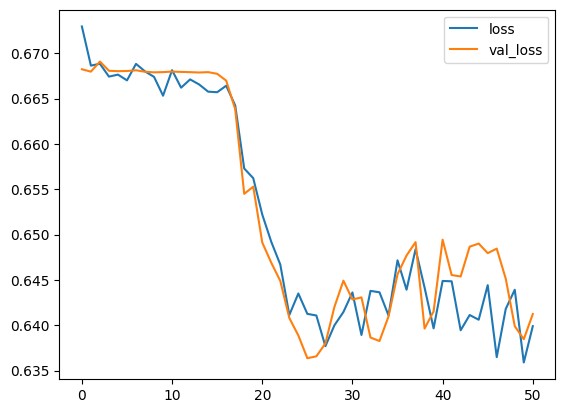

In [345]:
losses.plot()

In [346]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.6412


0.6412376165390015

In [347]:
preds = model.predict(X_test)
preds = (preds > 0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [348]:
from sklearn.metrics import accuracy_score

In [349]:
print(accuracy_score(y_test,preds))

0.6119298245614035
